In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

## Carga dos dados

In [2]:
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [3]:
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [4]:
# ver Dataframe
df_pontuacao

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
...,...,...
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795


## EDA

In [5]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

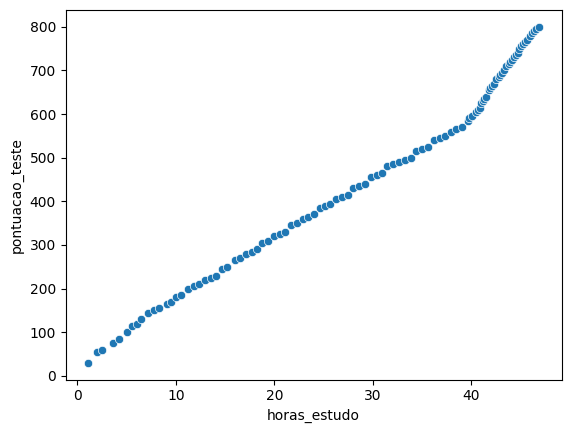

In [6]:
# plot de dispersão
# X = horas_estudo
# y = pontuacao_teste
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

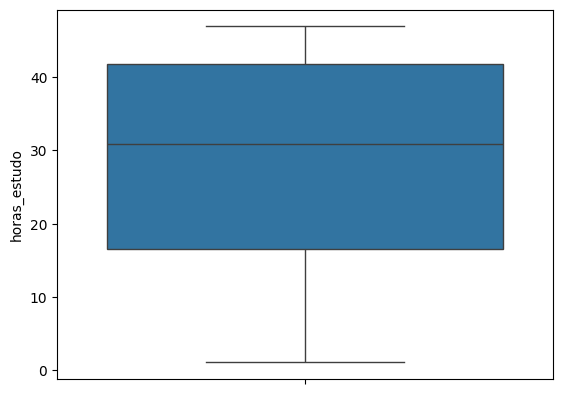

In [7]:
# verificar outliers
# box plot
sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

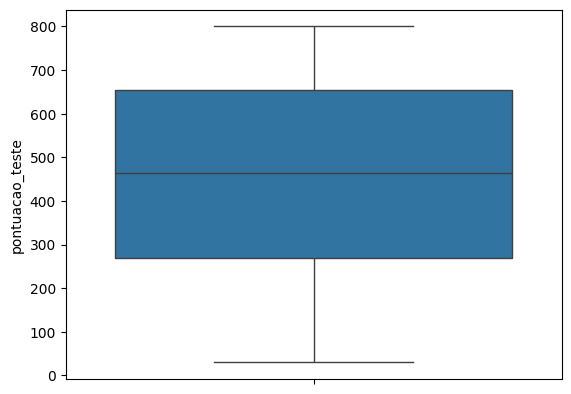

In [8]:
# verificar outliers
# box plot
sns.boxplot(df_pontuacao, y='pontuacao_teste')

CONCLUSÃO: sem outliers

<Axes: >

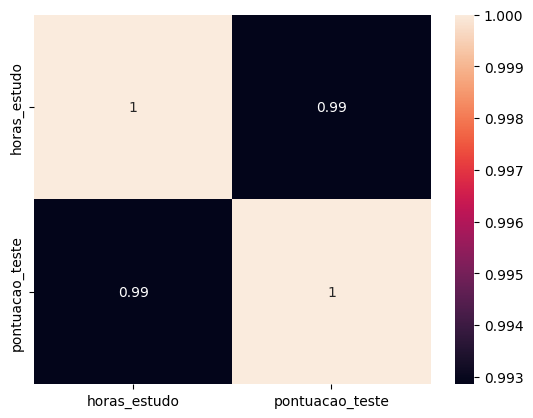

In [9]:
# verificar correlação entre variaveis - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

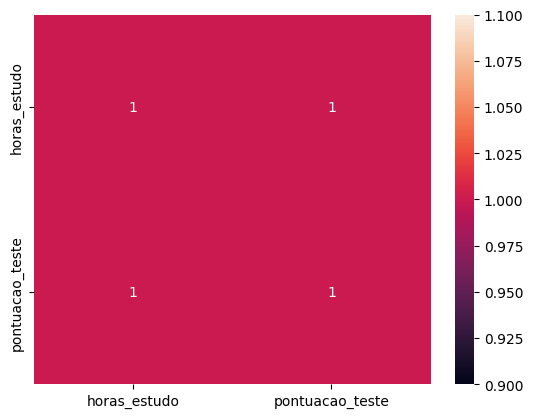

In [10]:
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

- não temos outliers
- a dispersão é linear, até certo ponto de 600 de pontuação
- correlação forte

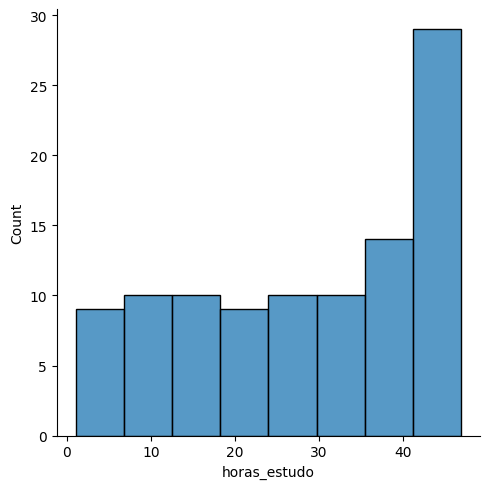

In [11]:
# histograma
sns.displot(df_pontuacao, x='horas_estudo')

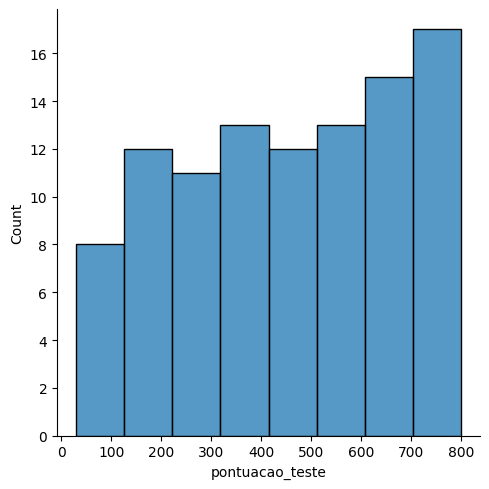

In [12]:
# histograma
sns.displot(df_pontuacao, x='pontuacao_teste')

## Treinar modelo

In [13]:
# divisão do dataset entre treino e teste, com ajuste de "shape", pois temos apenas uma feature (coluna) sendo atribuída às variáveis 
X = df_pontuacao.horas_estudo.values.reshape(-1, 1)
y = df_pontuacao.pontuacao_teste.values.reshape(-1, 1)
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [14]:
# instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [15]:
# treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [16]:
reg_model.coef_

array([[15.64844429]])

In [17]:
reg_model.intercept_

array([8.06818082])

In [18]:
# imprimir equação da reta
# y = aX + b
print("A equação da reta é y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é y = 15.648444x + 8.068181


Ou seja, na reta, onde x é 0, o y é 8.068

## Validação de modelo - métricas

In [19]:
# predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(x_test)

In [20]:
# calcular métrica R-squared ou coeficiente de determinação (vai de 0 a 1)
# r^2 representa a proporção da variação na variável dependente, que é explicada pela variável independente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred)

0.989238918803925

In [21]:
# calcular métrica MAE
# média da diferença entre o valor predito e o valor de teste
# MAE é menos sensível a outliers, por não elevar ao quadrado
mean_absolute_error(y_test, y_pred)

19.957546510279993

considerando que o teste vá de 0 a 800, 19 pontos de erro na predição talvez seja aceitável

In [22]:
# calcular métrica MSE
# MSE = média (y_test - y_pred)2
# é mais sensível a outliers e penaliza grandes erros
# é boa para comparação de modelos
mean_squared_error(y_test, y_pred)

570.9738980496197

In [ ]:
# calcular métrica RMSE
# MSE = Raiz (média (y_test - y_pred)2)
# é mais sensível a outliers e penaliza grandes erros
# é boa para comparação de modelos
mean_squared_error(y_test, y_pred, squared=False)

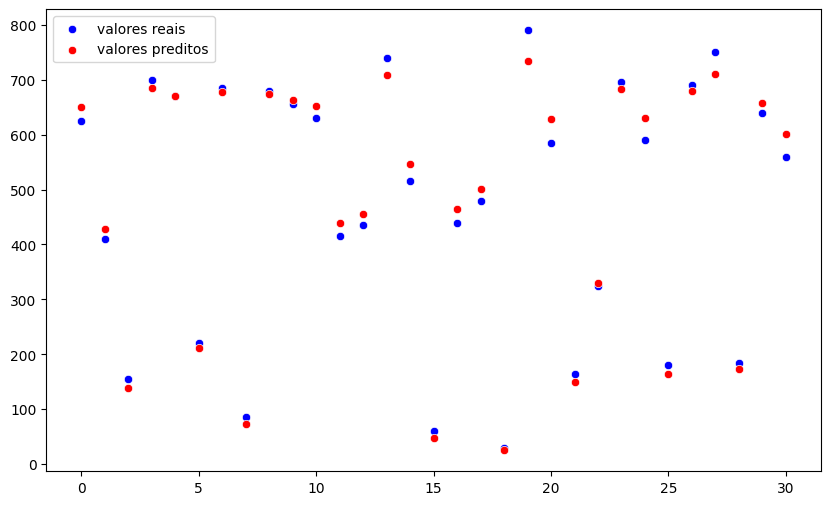

In [24]:
# análise gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))

sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='valores reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='valores preditos')
plt.legend()
plt.show()

## Análise de resíduos

In [25]:
# calcular os resíduos
residuos = y_test - y_pred

In [26]:
# calcular os resíduos de forma padronizada (standardization)
# para cada elemento de um conjunto (X - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

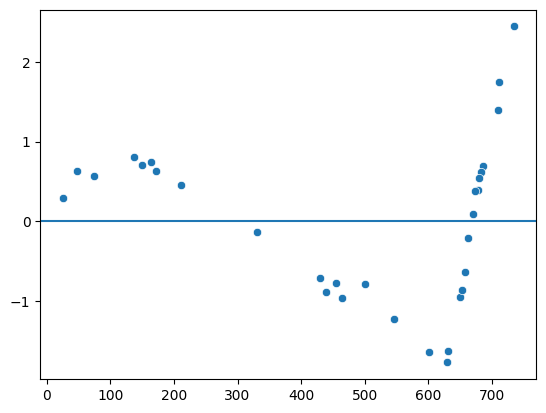

In [27]:
# verificar linearidade do modelo:
# se os resíduos estiverem entre -2 e +2 (na escala padrão) -> indica linearidade

# verificar homogeneidade das variâncias (homocedasticidade)
# se os valores estiverem em torno da reta, temos homocedasticidade, caso contrário, se tivermos alguma tendência ou padrão (formam um cone, funil), há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

Linearidade: há um indício de valores mais altos saírem do range esperado

Homogeneidade das variâncias: não, é perceptível a presença de padrões fora da reta (heterocedasticidade)

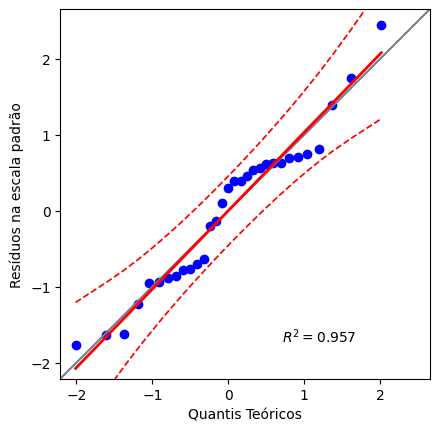

In [28]:
# checar se resíduos seguem uma distribuição normal
# QQ plot, que avalia se uma amostra segue uma distribuição normal
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [29]:
# teste de normalidade - shapiro wilk
# h0 - resíduos seguem uma dist. normal
# h1 - resíduos não seguem uma dist. normal
# se o p-value > 0.05 não rejeitamos h0, senão rejeitamos
stat_shapiro, p_value_shapiro = shapiro(residuos.reshape(-1))
stat_shapiro, p_value_shapiro

(0.9554827698490802, 0.22067037798560118)

In [30]:
# teste de normalidade - kolmogorov-smirnov
# h0 - resíduos seguem uma dist. normal
# h1 - resíduos não seguem uma dist. normal
# se o p-value > 0.05 não rejeitamos h0, senão rejeitamos
stat_ks, p_value_ks = kstest(residuos.reshape(-1), 'norm')
stat_ks, p_value_ks

(0.5161278444860566, 3.3727708299345416e-08)

## Fazendo predições com o modelo

In [31]:
# se eu estudar 30.4 horas, qual a pontuação prevista pelo modelo?
reg_model.predict([[30.4]])

array([[483.78088724]])

In [32]:
# quantas horas estudar para obter 600 pontos (pelo modelo)?
# y = ax + b
# y - b = ax
# (y - b) / a = x
# x = (y - b) / a
(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

37.82687966967263

## Salvar modelo para usar depois

In [33]:
import joblib
joblib.dump(reg_model, './modelo_regressao.pkl')

['./modelo_regressao.pkl']